# Análise de Dados sobre Autenticidade de Cédulas 💵📊

**Projeto Final | Módulo: Machine Learning 2 | Programa <BeTech\> by Braskem**

**Alunos:**
- Caio Henrique
- Daniel Costa
- Janderson Freitas
- Maria Carolina Barros
- Robinson

## Introdução

Este é o projeto final do módulo "Machine Learning 2". Nossa missão é explorar o conjunto de dados sobre autenticidade de cédulas. Imagine que estamos trabalhando para uma instituição financeira e desejamos criar um modelo capaz de identificar cédulas falsas.

Para realizar essa tarefa, utilizaremos o conjunto de dados de "Cédulas Falsas" (Fake Bills, em inglês), disponível no Kaggle. Esse conjunto de dados inclui informações sobre diversas características das cédulas, como diagonal, altura esquerda, altura direita, margem inferior, margem superior e comprimento, bem como uma variável booleana que indica se a cédula é genuína (Que não será utilizada).

Nosso objetivo é explorar esses dados, desenvolver modelos de machine learning e prever a autenticidade das cédulas. Com isso, esperamos tomar decisões mais informadas e identificar cédulas falsas de forma eficaz.

Vamos começar nossa jornada de análise e predição da autenticidade das cédulas! 💵🔍

## Contexto

Imagine que estamos trabalhando para a casa da moeda e somos encarregados, como um equipe de cientistas de dados, de verificar uma amostragem das características físicas das cédulas que circulam no mercado. Nosso objetivo será explorar esses dados e aplicar os conceitos de aprendizado de máquina para analisar os dados. Com isso, desejamos criar um modelo de clusterização capaz de identificar padrões nas caracteristicas das cédulas para eventual análise da instituição.

Para realizar essa tarefa, utilizaremos o conjunto de dados de "Cédulas Falsas" (Fake Bills, em inglês), disponível no Kaggle. Esse conjunto de dados inclui informações sobre diversas características das cédulas, como diagonal, altura esquerda, altura direita, margem inferior, margem superior e comprimento.


## Dataset

Utilizaremos uma versão* do conjunto de dados "Fake Bills", que inclui 1500 registros e 6 colunas. Essas colunas representam informações sobre características das cédulas.

- diagonal: float
- height_left: float
- height_right: float
- margin_low: float
- margin_upper: float
- length: float

*Nossa versão é o "fake_bills_unsuperv.csv", que foi ajustada do dataset original para se adequar aos modelos de aprendizado não-supervisionados.

**Fonte do Dataset original:** [Fake Bills](https://www.kaggle.com/datasets/alexandrepetit881234/fake-bills/data)

## Objetivos

Nossos principais objetivos neste projeto são:

> Explorar e analisar o conjunto de dados sobre autenticidade de cédulas.

> Verificar como os modelos de *Clusterização* KMeans e DBScan se comportam com os dados do *Fake_Bills_Usupervised*.

Vamos mergulhar nos dados e iniciar nossa jornada 💵🔍


## Parte 1: Exploração e pré-processamento de dados

In [1]:
# Importando Bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
#importando CSV

df_fakebills = pd.read_csv('fake_bills_unsuperv.csv', index_col=0)
df_fakebills.head()

diagonal  height_left  height_right  margin_low  margin_up  length
0    171.81       104.86        104.95        4.52       2.89  112.83
1    171.46       103.36        103.66        3.77       2.99  113.09
2    172.69       104.48        103.50        4.40       2.94  113.16
3    171.36       103.91        103.94        3.62       3.01  113.51
4    171.73       104.28        103.46        4.04       3.48  112.54

In [4]:
df_fakebills.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      1500 non-null   float64
 1   height_left   1500 non-null   float64
 2   height_right  1500 non-null   float64
 3   margin_low    1463 non-null   float64
 4   margin_up     1500 non-null   float64
 5   length        1500 non-null   float64
dtypes: float64(6)
memory usage: 82.0 KB


In [5]:
df_fakebills.isna().sum()

diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [6]:
df_fakebills.dropna(inplace=True)

In [7]:
df_fakebills.head()

diagonal  height_left  height_right  margin_low  margin_up  length
0    171.81       104.86        104.95        4.52       2.89  112.83
1    171.46       103.36        103.66        3.77       2.99  113.09
2    172.69       104.48        103.50        4.40       2.94  113.16
3    171.36       103.91        103.94        3.62       3.01  113.51
4    171.73       104.28        103.46        4.04       3.48  112.54

## Parte 2: Visualização de dados

<Axes: >

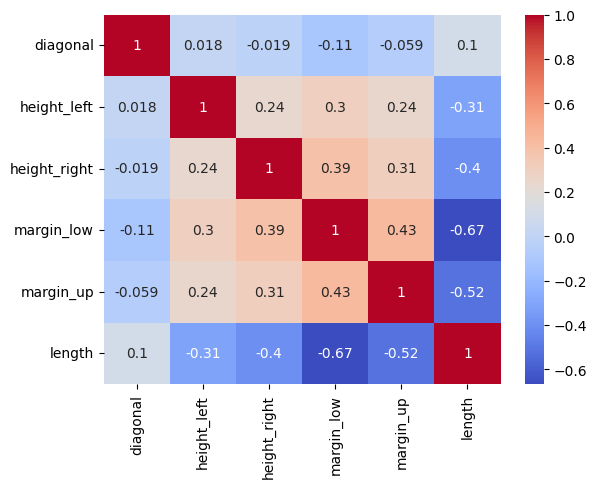

In [8]:
corr = df_fakebills.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")

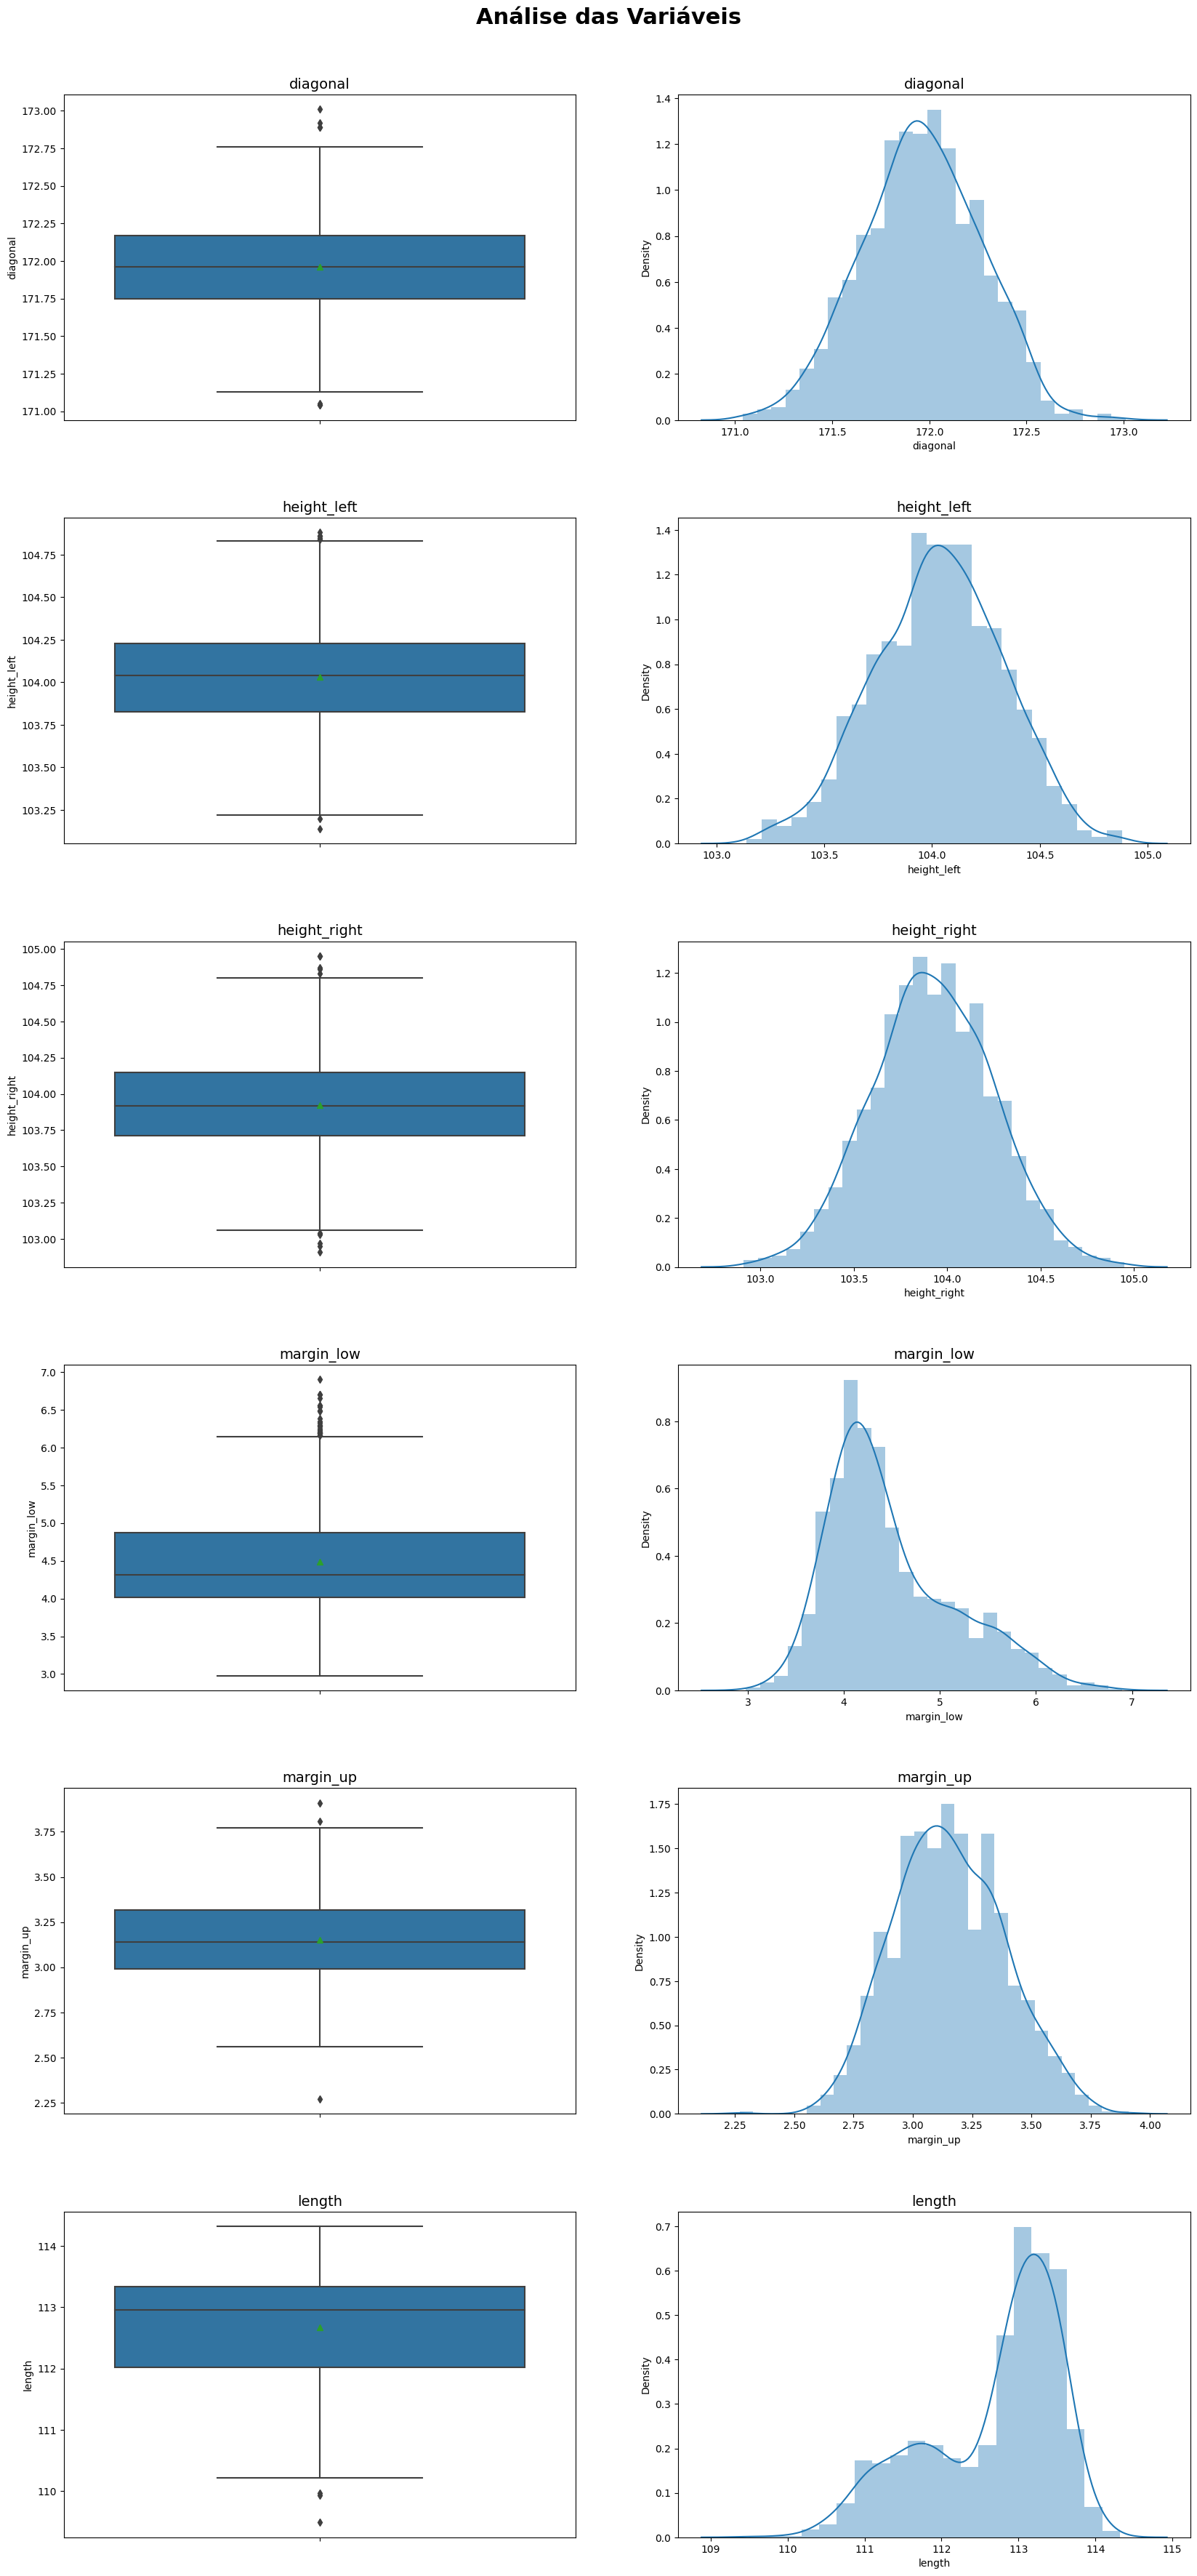

In [9]:
fig, ax = plt.subplots(figsize=(20,40))

plt.suptitle("Análise das Variáveis", fontsize=22, fontweight= 600)

linhas = 6
colunas = 2
posicao = 1


for coluna in df_fakebills:
  plt.subplot(linhas, colunas, posicao)
  plt.title(f"{coluna}", loc="center", fontsize=14, fontweight=200)
  sns.boxplot(data=df_fakebills, y=coluna, showmeans=True)
  posicao += 1
  plt.subplot(linhas, colunas, posicao)
  plt.title(f"{coluna}", loc="center", fontsize=14, fontweight=200)
  sns.distplot(df_fakebills[coluna])
  posicao += 1

plt.subplots_adjust(top=0.95, hspace=0.3)
plt.show()

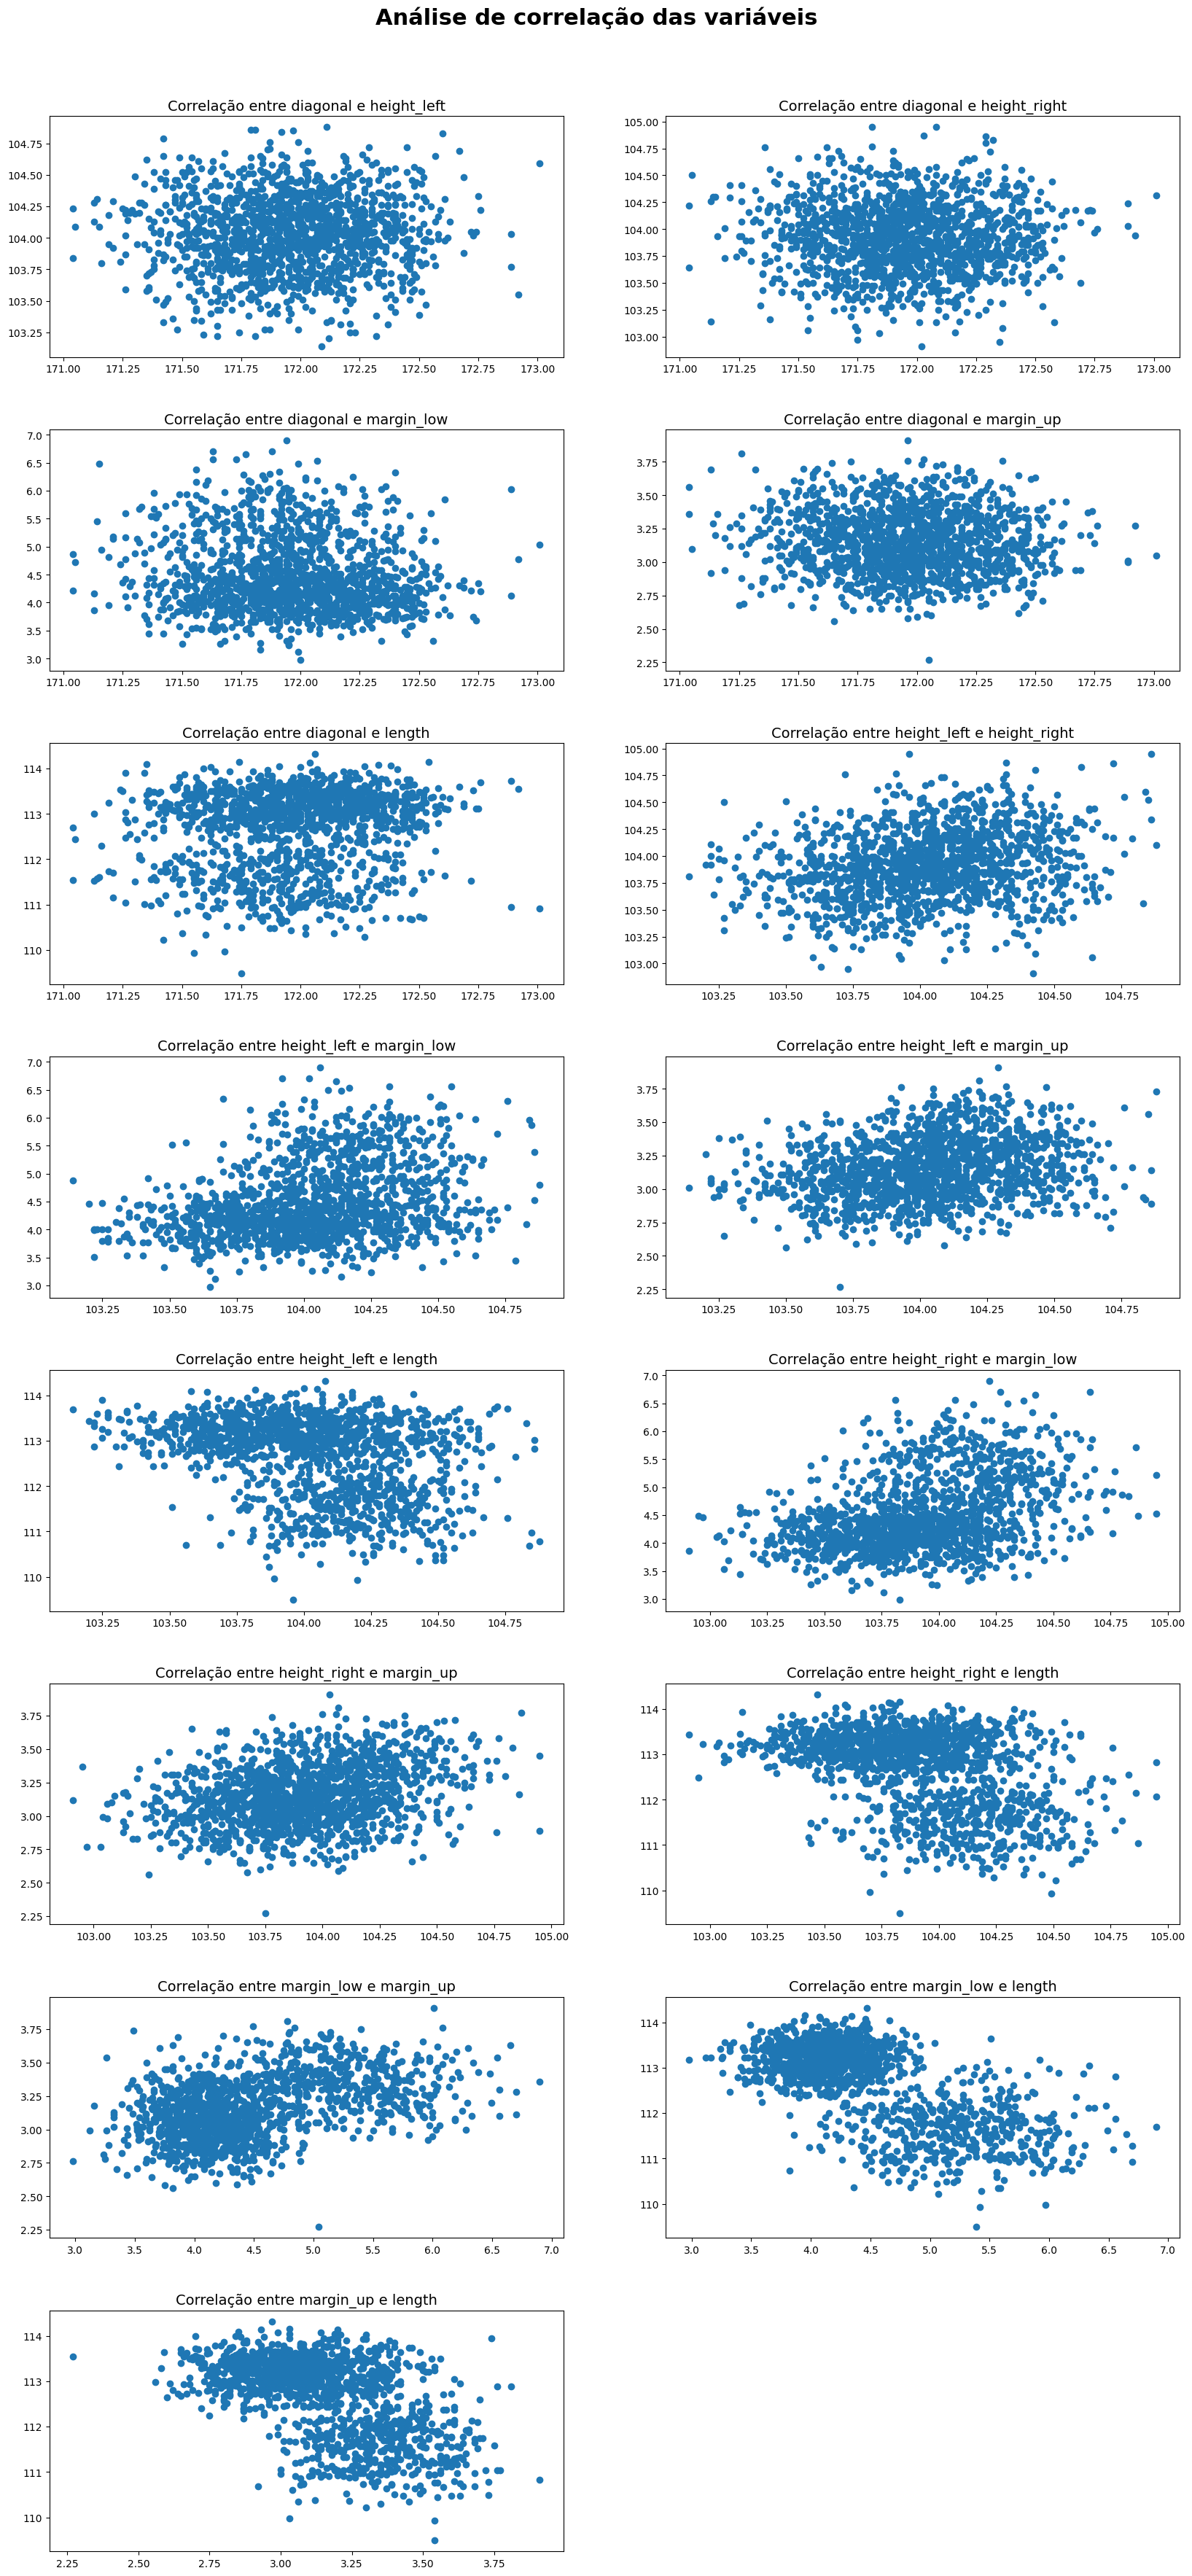

In [10]:
fig, ax = plt.subplots(figsize=(20, 50))

plt.suptitle("Análise de correlação das variáveis", fontsize=22, fontweight=600)

linhas = 10
colunas = 2
posicao = 1

col_name = df_fakebills.columns

for i in range(len(col_name)):
    for j in range(i + 1, len(col_name)): 
        plt.subplot(linhas, colunas, posicao)
        plt.title(f"Correlação entre {col_name[i]} e {col_name[j]}", loc="center", fontsize=14, fontweight=200)
        plt.scatter(df_fakebills[col_name[i]], df_fakebills[col_name[j]], marker='o')
        posicao += 1

plt.subplots_adjust(top=0.95, hspace=0.3)
plt.show()

## Parte 3: K-Means

#### 3.1 Usando funções de cálculo de inércia e gráfico do "cotovelo" para analisar otimização de clusters
##### Sabemos que é um caso de 2 clusters: Cédula verdadeira ou Cédula falsa mas vamos passar pelo processo pela análise

In [11]:
def calc_inercias(X, lista_k):

    lista_wcss = []

    for k in lista_k:
        # Treina o k-means para cada valor de K
        kmeans = KMeans(n_clusters=k).fit(X)

        # Cria lista com as inércias
        lista_wcss.append(kmeans.inertia_)
            
    return lista_wcss


def plot_cotovelo(lista_k, lista_wcss):
    plt.figure(figsize=(10, 5))

    plt.title("Método do cotovelo")

    plt.plot(lista_k, lista_wcss, marker="o")
    plt.grid()

    plt.xlabel("# de clusters")
    plt.ylabel("Inércia (WCSS)")

    plt.show()

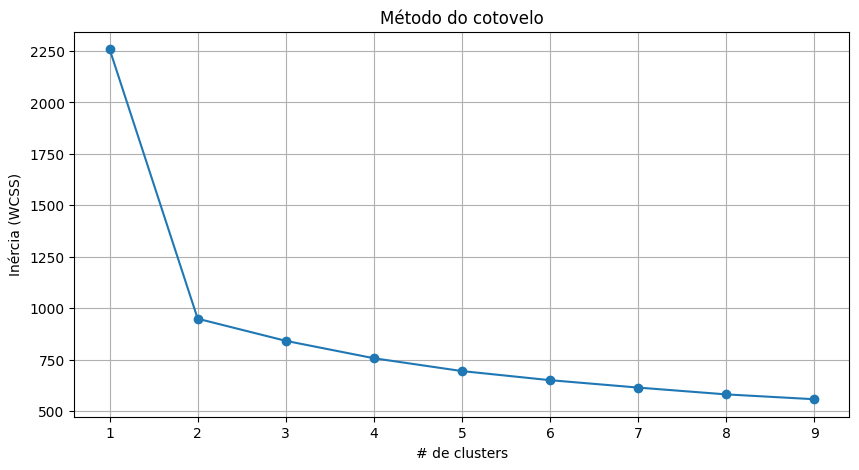

In [12]:
lista_k = range(1, 10)
lista_inercias = calc_inercias(df_fakebills, lista_k)

plot_cotovelo(lista_k, lista_inercias)

#### 3.2 Definindo número de clusters e fazendo "fitando" os dados

In [13]:
kmeans_md = KMeans(n_clusters=2, random_state=42)
kmeans_md.fit(df_fakebills)

KMeans(n_clusters=2, random_state=42)

#### 3.3 Visualizando dados clusterizados

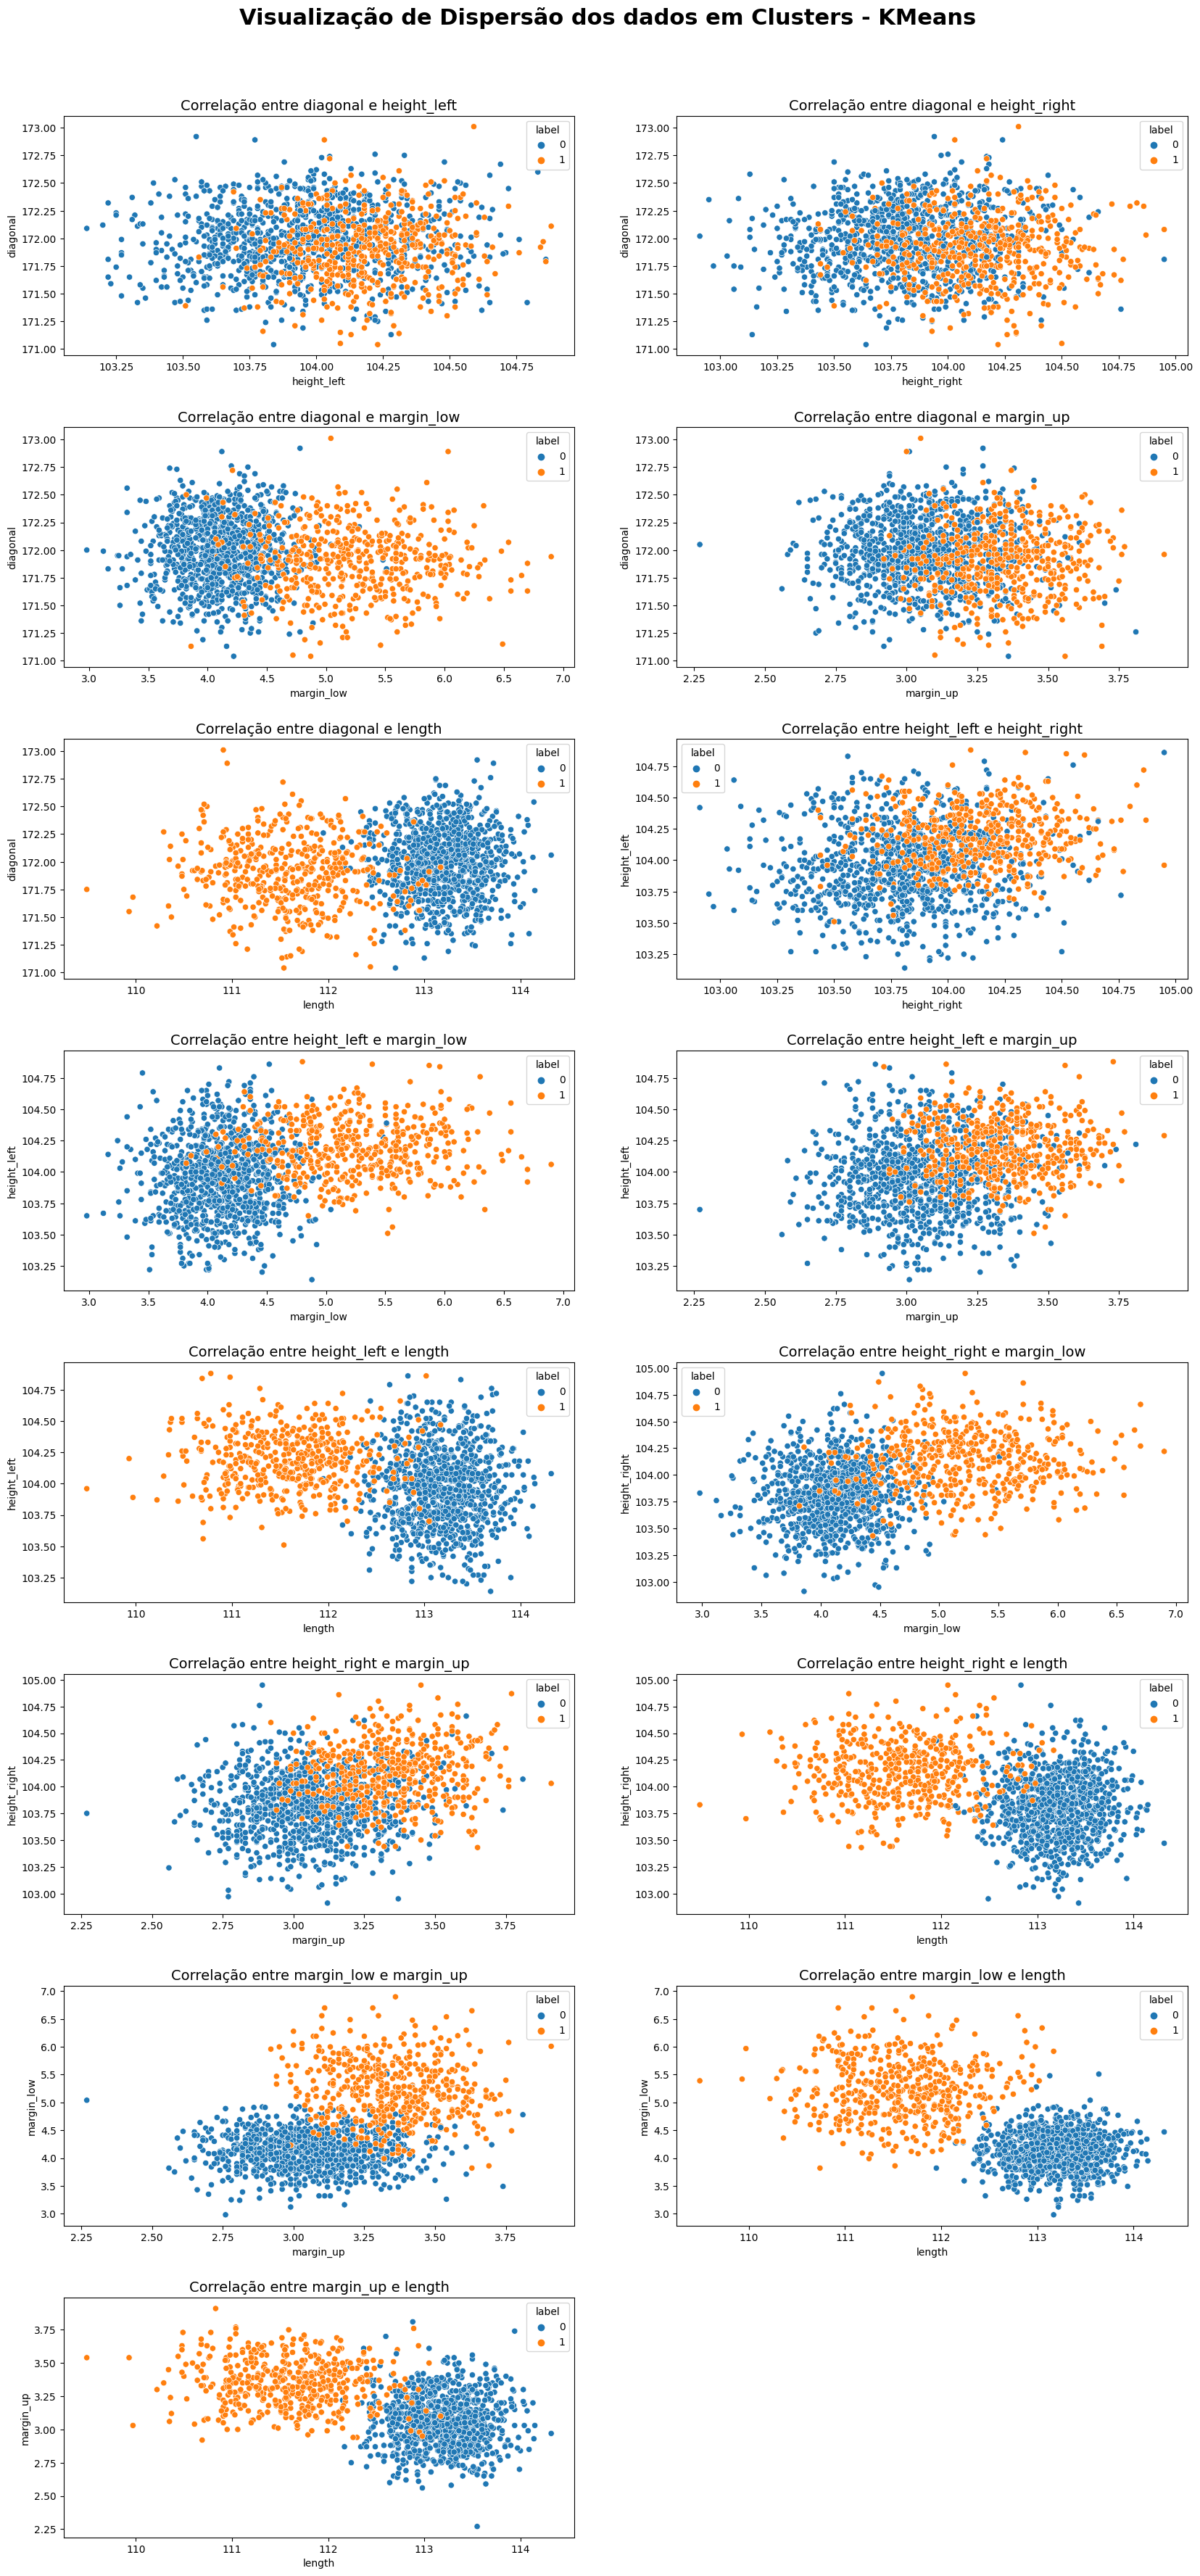

In [15]:
fig, ax = plt.subplots(figsize=(20, 50))

plt.suptitle("Visualização de Dispersão dos dados em Clusters - KMeans", fontsize=22, fontweight=600)

linhas = 10
colunas = 2
posicao = 1

col_name = df_fakebills.columns

for i in range(len(col_name)):
    for j in range(i + 1, len(col_name)):
        plt.subplot(linhas, colunas, posicao)
        plt.title(f"Correlação entre {col_name[i]} e {col_name[j]}",
                                      loc="center", fontsize=14,
                                      fontweight=200)
        sns.scatterplot(data=result_kmeans, x= col_name[j],
                        y=col_name[i], hue='label')
        posicao += 1

plt.subplots_adjust(top=0.95, hspace=0.3)
plt.show()

Análisando a dispersão é possivel observar que a correlação das features margin_low (margem inferior) e length (comprimento), possuem, visualmente, uma separação mais clara entre as classificações dos clusters KMeans

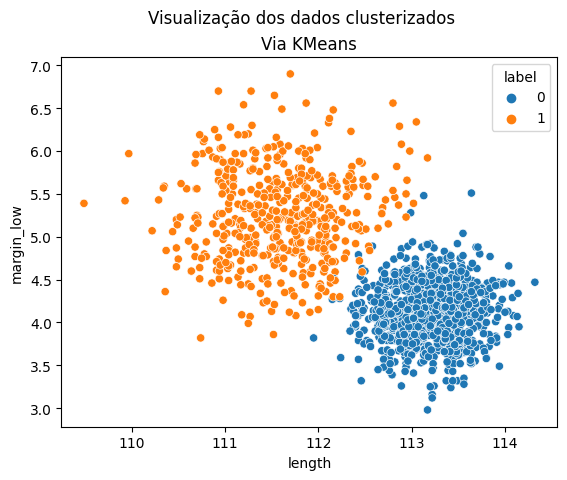

In [14]:
result_kmeans = df_fakebills.copy()
result_kmeans['label'] = kmeans_md.labels_

plt.suptitle("Visualização dos dados clusterizados")
plt.title("Via KMeans")
sns.scatterplot(data=result_kmeans, x='length', y='margin_low', hue='label')
plt.show()

### Parte 4: DBSCAN

#### 4.1 Instanciando modelo e "fitando" os dados

In [16]:
db_md = DBSCAN(eps=0.5, min_samples=10)
db_md.fit(df_fakebills)

DBSCAN(min_samples=10)

#### 4.2 Visualizando dados clusterizados

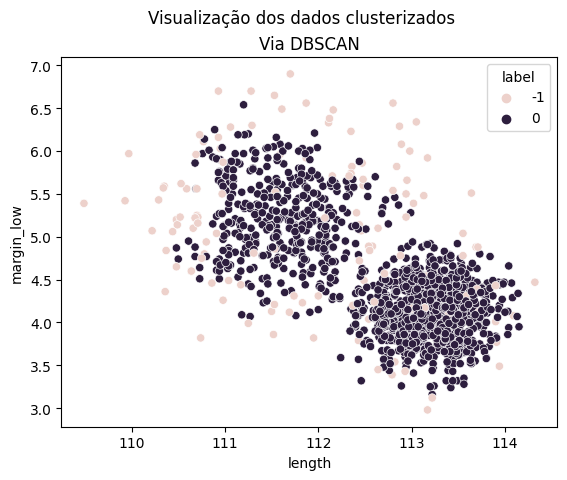

In [17]:
result_db = df_fakebills.copy()
result_db['label'] = db_md.labels_

plt.suptitle("Visualização dos dados clusterizados")
plt.title("Via DBSCAN")
sns.scatterplot(data=result_db, x='length', y='margin_low', hue='label')
plt.show()

#### 4.3 Otimizando número de pontos (min_samples)

In [18]:
# Definindo lista de pontos
lista_pts = []
lista_pts.append(1)
for x in range(5, 55, 5):
  lista_pts.append(x)

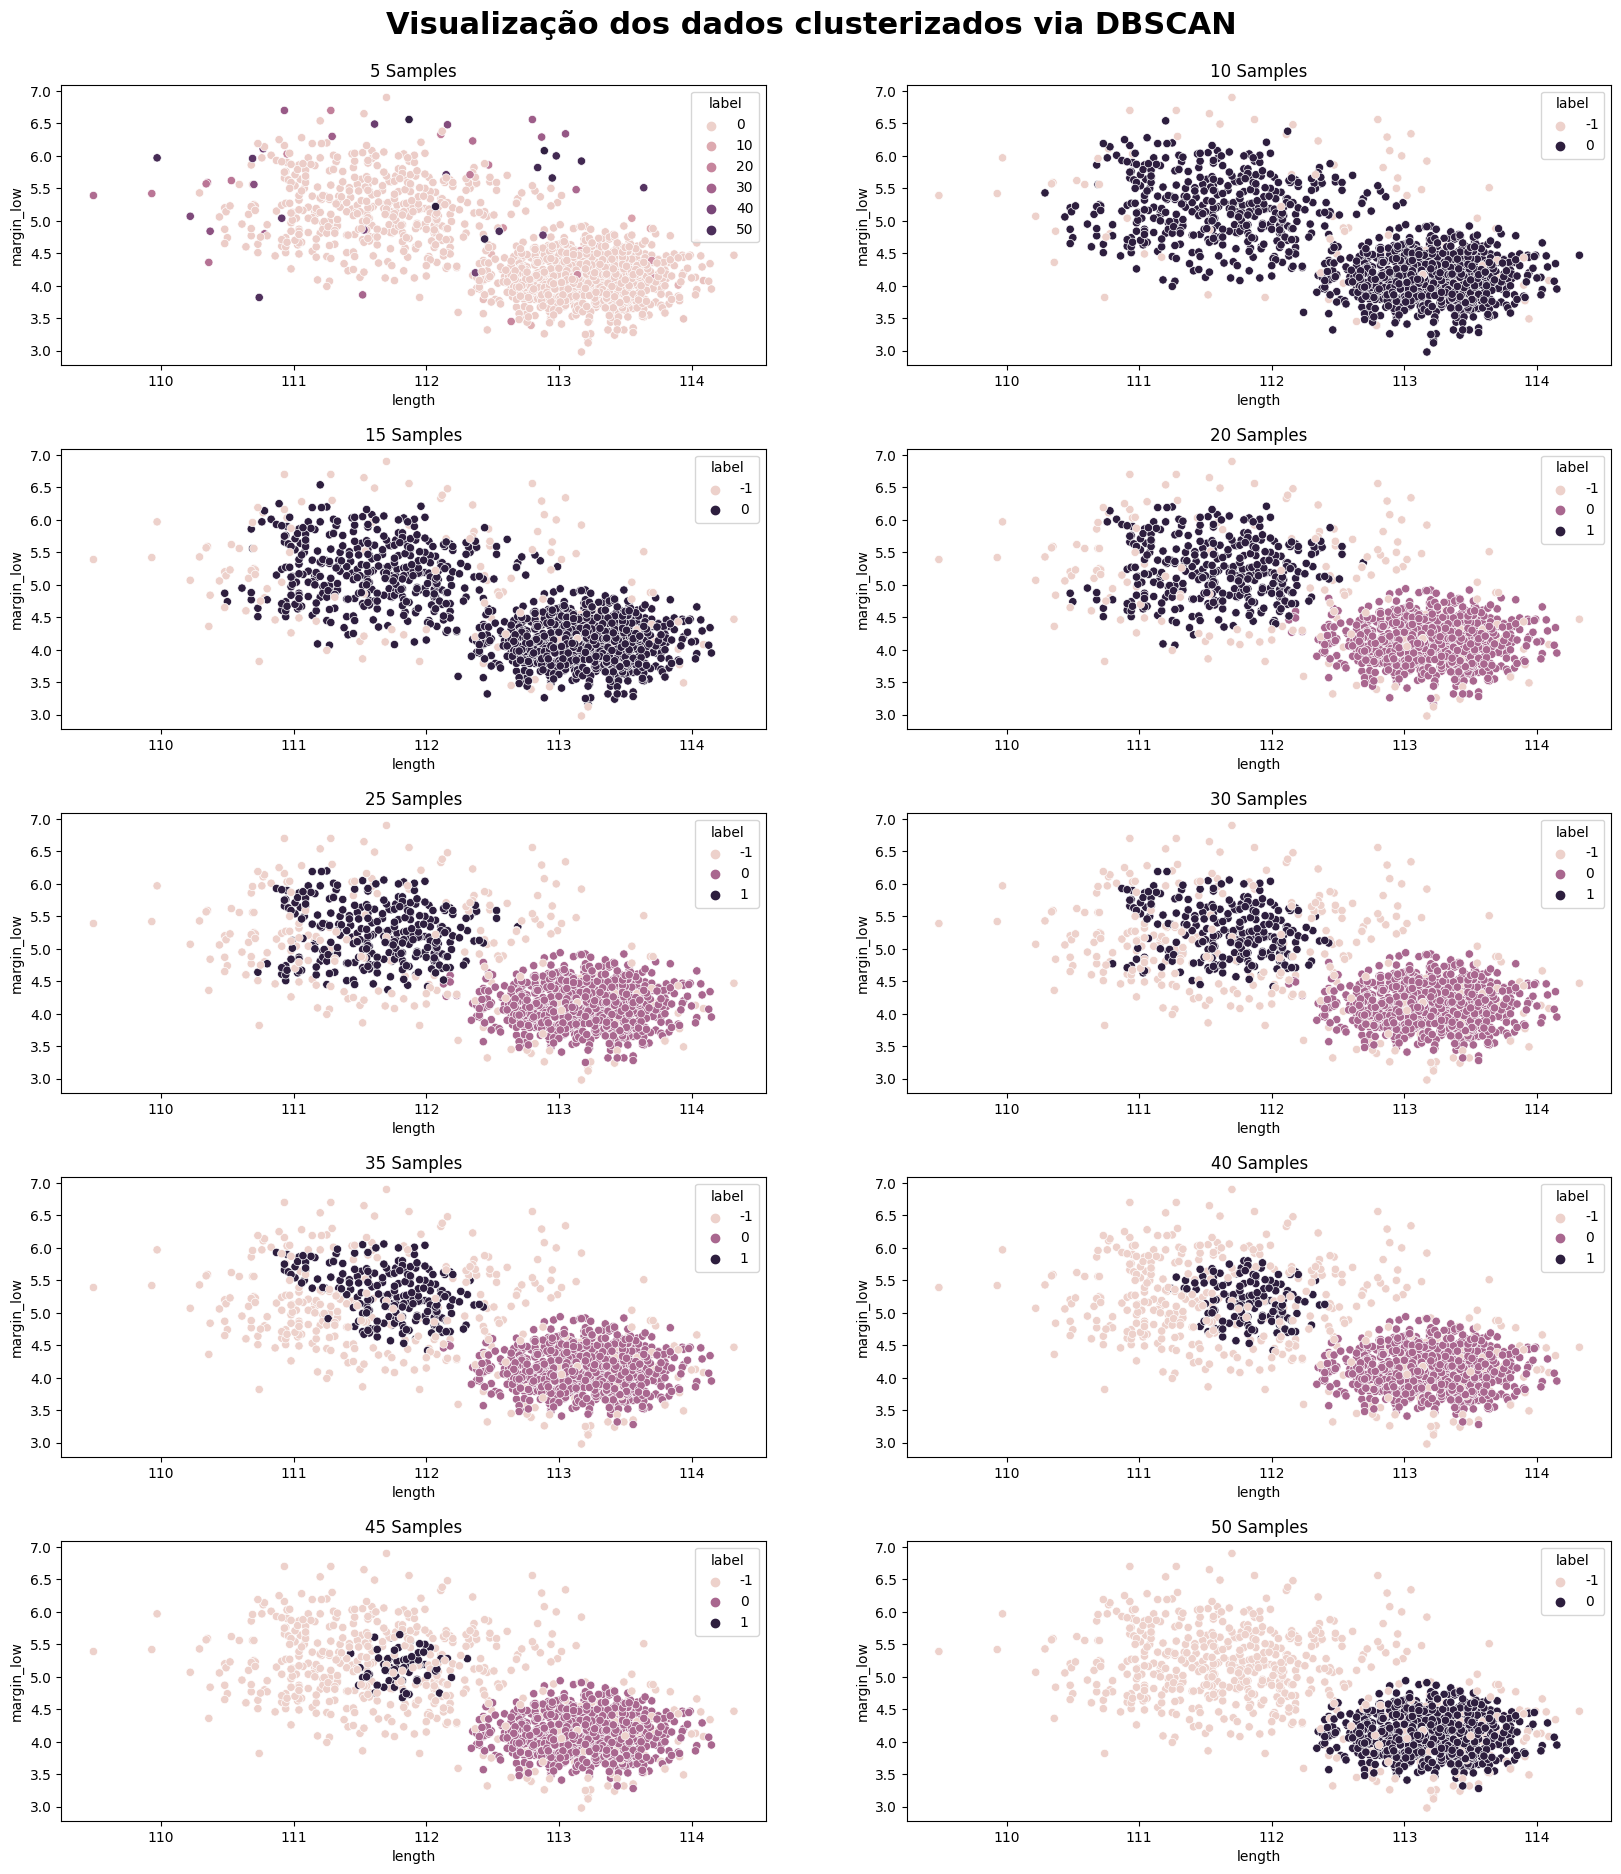

In [19]:
# Definindo gráficos de clusterização
fig, ax = plt.subplots(figsize=(20, 25))

plt.suptitle("Visualização dos dados clusterizados via DBSCAN", fontsize=22, fontweight=600)

posicao = 1

for x in lista_pts:
    plt.title(f"{x} Samples")

    if posicao == 11:
        break

    plt.subplot(6, 2, posicao)  # 5 linhas, 2 colunas e posição

    db_md = DBSCAN(eps=0.5, min_samples=x)
    db_md.fit(df_fakebills)
    result_db = df_fakebills.copy()
    result_db['label'] = db_md.labels_
    sns.scatterplot(data=result_db, x='length', y='margin_low', hue='label')
    
    posicao += 1
    

plt.subplots_adjust(top=0.95, hspace=0.3, wspace=0.2)
plt.show()

#### 4.3.1 Fine Tuning

O DBSCAN aparenta clusterizar melhor quando "min_samples" está entre 15 e 25. Vamos tentar novamente usando estes valores.

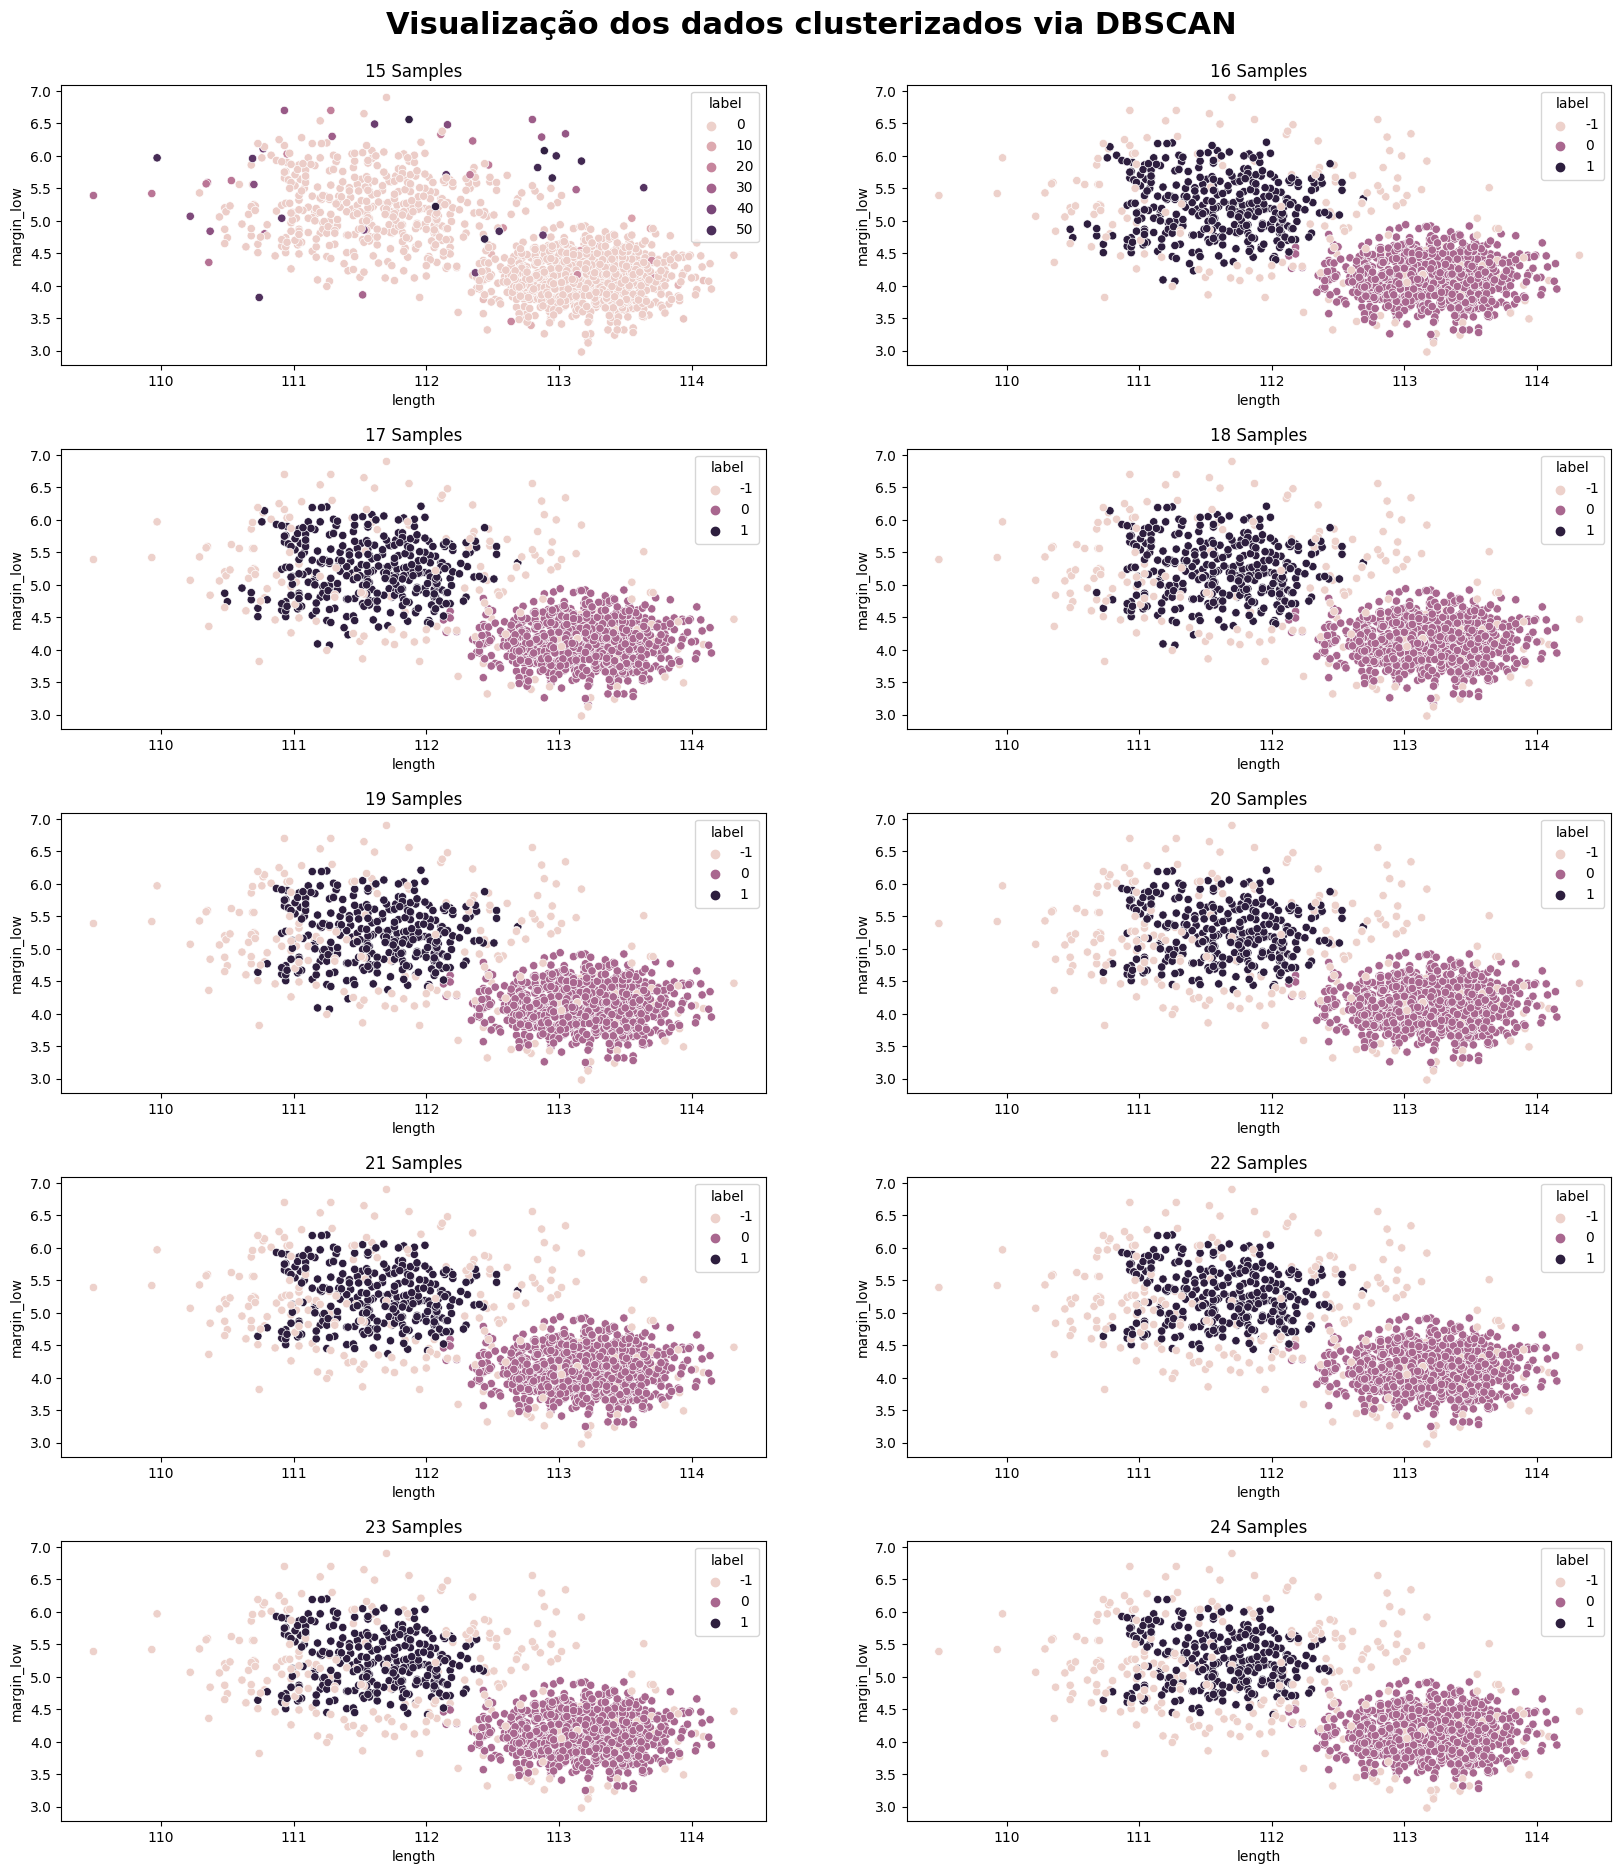

In [20]:
# Definindo lista de pontos
lista_pts = []
lista_pts.append(1)
for x in range(15, 25):
  lista_pts.append(x)


# Definindo gráficos de clusterização
fig, ax = plt.subplots(figsize=(20, 25))

plt.suptitle("Visualização dos dados clusterizados via DBSCAN", fontsize=22, fontweight=600)

posicao = 1

for x in lista_pts:
    plt.title(f"{x} Samples")

    if posicao == 11:
        break

    plt.subplot(6, 2, posicao)  # 5 linhas, 2 colunas e posição

    db_md = DBSCAN(eps=0.5, min_samples=x)
    db_md.fit(df_fakebills)
    result_db = df_fakebills.copy()
    result_db['label'] = db_md.labels_
    sns.scatterplot(data=result_db, x='length', y='margin_low', hue='label')
    
    posicao += 1
    

plt.subplots_adjust(top=0.95, hspace=0.3, wspace=0.2)
plt.show()

In [21]:
from collections import Counter

cluster_info = {}

for x in range(16, 20):
    db_md = DBSCAN(eps=0.5, min_samples=x)
    db_md.fit(df_fakebills)
    labels = db_md.labels_

    num_cluster = Counter(labels)
    cluster_info[x] = num_cluster

print("Min_samples vs Número de pontos no cluster:")
for x, counts in cluster_info.items():
    print(f"\nmin_samples = {x}:")
    for label, count in counts.items():
        if label == -1:
            print(f"  Noise: {count} pontos")
        else:
            print(f"  Cluster {label}: {count} pontos")


Min_samples vs Número de pontos no cluster:

min_samples = 16:
  Noise: 189 pontos
  Cluster 0: 938 pontos
  Cluster 1: 336 pontos

min_samples = 17:
  Noise: 203 pontos
  Cluster 0: 936 pontos
  Cluster 1: 324 pontos

min_samples = 18:
  Noise: 216 pontos
  Cluster 0: 936 pontos
  Cluster 1: 311 pontos

min_samples = 19:
  Noise: 226 pontos
  Cluster 0: 936 pontos
  Cluster 1: 301 pontos


### Parte 5: Conclusão

O K-Means mostrou um desempenho melhor na tarefa de clusterização das cédulas. No entanto, é importante notar que o DBSCAN aparentou melhor clusterização quando o parâmetro min_samples foi definido como 16.

O modelo que melhor atende a proposta estabelecida foi o K-Means. O K-Means mostrou um desempenho melhor na tarefa de clusterização das cédulas em dois grupos, além da economia, praticidade e velocidade do resultado esperado.

No entanto, é importante notar que o DBSCAN identifica melhor candidatos a outliers.

Todas a informações serão encaminhadas para o setor de negócio e aguardaremos o feedback para nosso próximo direcionamento.